<a href="https://colab.research.google.com/github/AdityaSareen06/eda_project/blob/main/22BDS0311.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BCSE331L – Exploratory Data Analysis Project
**Reg No: 22BDS0311**

## Step 1: Load the Dataset

In [ ]:
import pandas as pd

# Load dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/insurance.csv"
df = pd.read_csv(url)

# Basic overview
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Step 2: Summary Statistics & Data Info

In [ ]:
# Data types and missing values
df.info()
print("\nMissing values:\n", df.isnull().sum())

# Summary statistics
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

Missing values:
 age         0
sex         0
bmi         1
children    0
smoker      1
region      1
charges     0
dtype: int64


,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1337.000000,1338.000000,1337,1337,1338.000000
unique,NaN,3,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,675,NaN,NaN,1063,364,NaN
mean,39.207025,NaN,30.658657,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098003,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.290000,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.675000,2.000000,NaN,NaN,16639.912515


## Step 3: Data Cleaning

We performed the following:
- Removed duplicate rows from the dataset.
- Confirmed that there are no missing values.
- Detected potential outliers in the `charges` column using the Interquartile Range (IQR) method.
- Categorical columns (`sex`, `smoker`, `region`) were encoded using one-hot encoding.


In [ ]:
# 1. Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

# 2. Check for missing values (reconfirm)
print("\nMissing values after dropping duplicates:")
print(df.isnull().sum())

# 3. Detect outliers using IQR method (for 'charges')
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['charges'] < lower_bound) | (df['charges'] > upper_bound)]
print("\nNumber of outliers in 'charges':", outliers.shape[0])

# 4. Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# 5. Final cleaned dataset preview
df_encoded.head()

Number of duplicate rows: 0

Missing values after dropping duplicates:
age         0
sex         0
bmi         1
children    0
smoker      1
region      1
charges     0
dtype: int64

Number of outliers in 'charges': 139


,age,bmi,children,charges,sex_female,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,True,False,False,True
1,18,33.770,1,1725.55230,False,True,False,False,True,False
2,28,33.000,3,4449.46200,False,True,False,False,True,False
3,33,22.705,0,21984.47061,False,True,False,True,False,False
4,32,28.880,0,3866.85520,False,True,False,True,False,False


## Step 4: Univariate Analysis

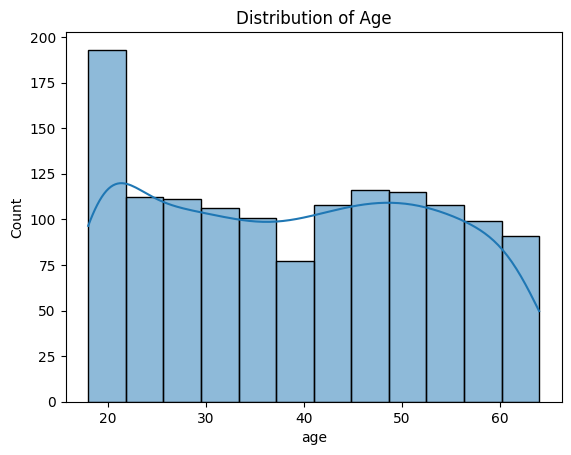

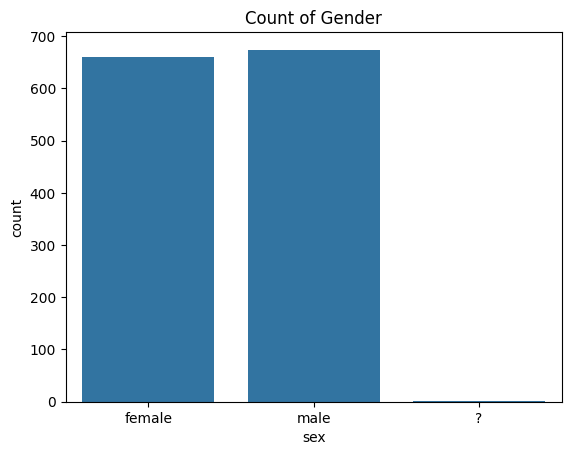

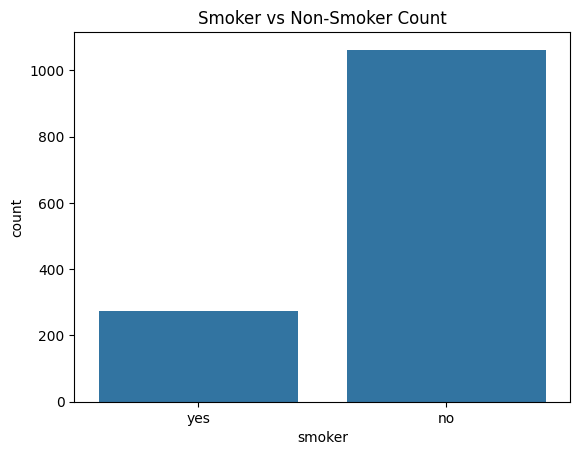

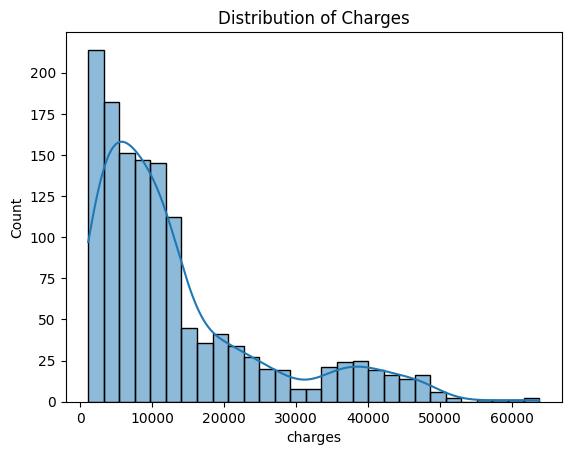

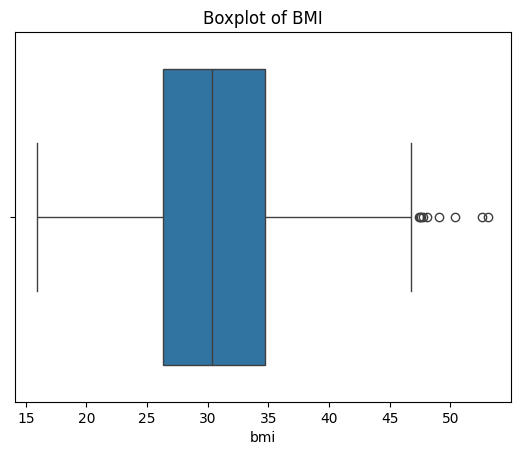

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Age distribution
sns.histplot(df['age'], kde=True)
plt.title("Distribution of Age")
plt.show()

# Gender count
sns.countplot(x='sex', data=df)
plt.title("Count of Gender")
plt.show()

# Smoker distribution
sns.countplot(x='smoker', data=df)
plt.title("Smoker vs Non-Smoker Count")
plt.show()

# Charges distribution
sns.histplot(df['charges'], kde=True)
plt.title("Distribution of Charges")
plt.show()

# Boxplot for BMI
sns.boxplot(x='bmi', data=df)
plt.title("Boxplot of BMI")
plt.show()

## Step 5: Bivariate Analysis

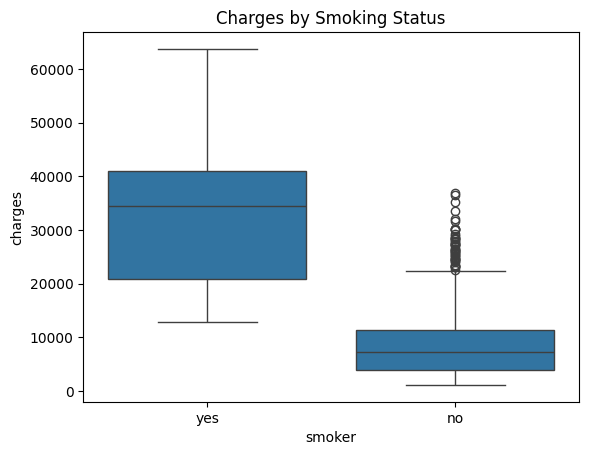

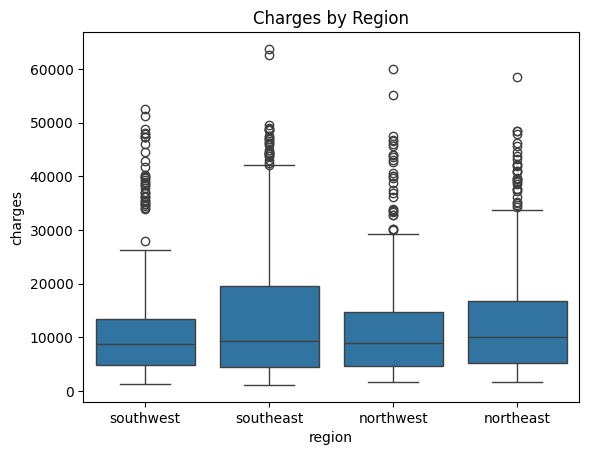

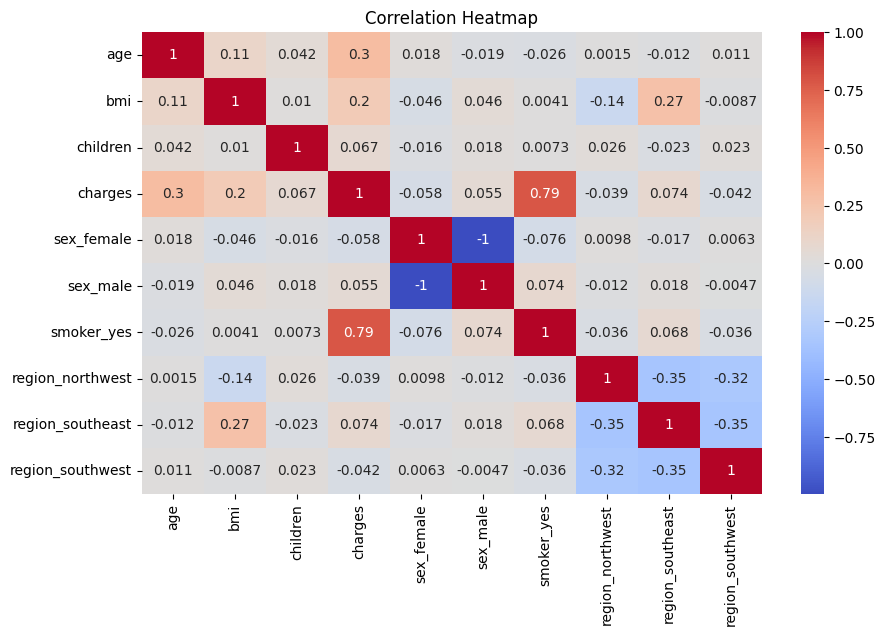

In [ ]:
# Charges by smoker
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Charges by Smoking Status")
plt.show()

# Charges by region
sns.boxplot(x='region', y='charges', data=df)
plt.title("Charges by Region")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## Step 6: Multivariate Analysis

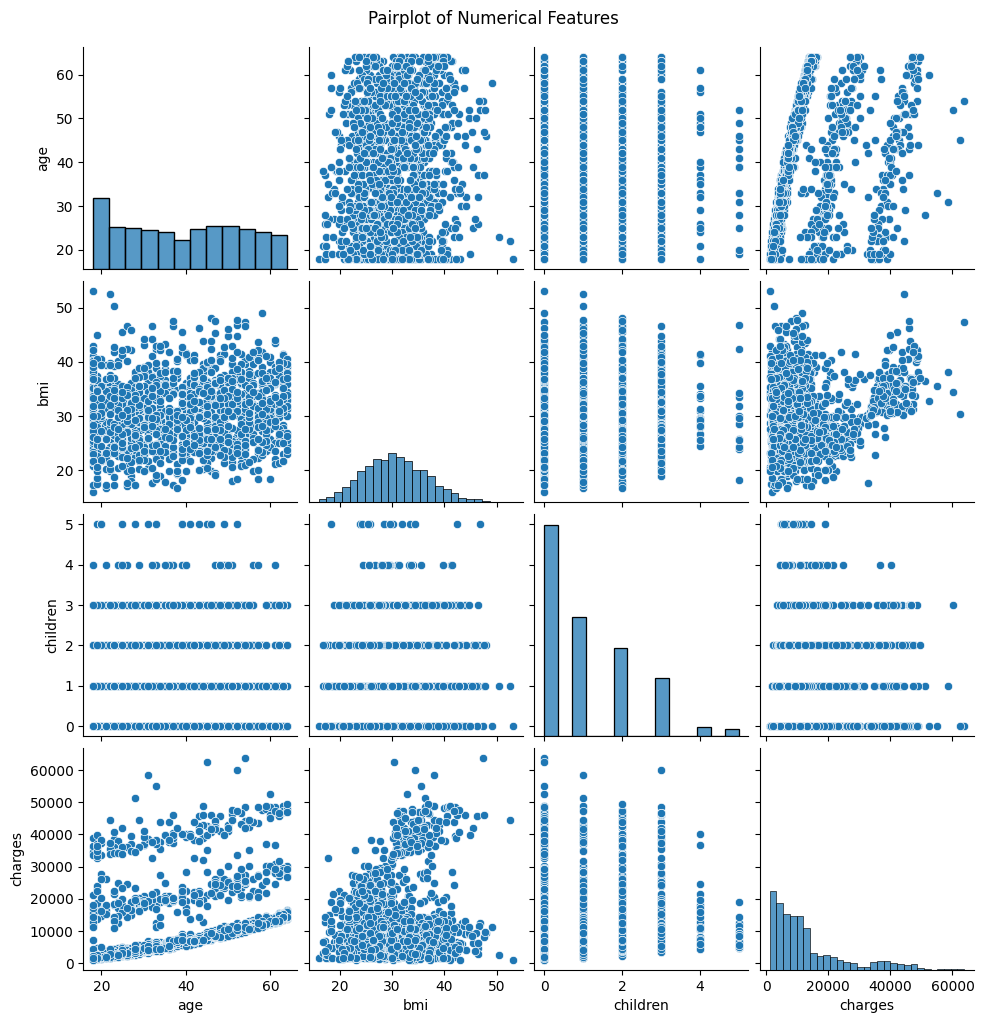

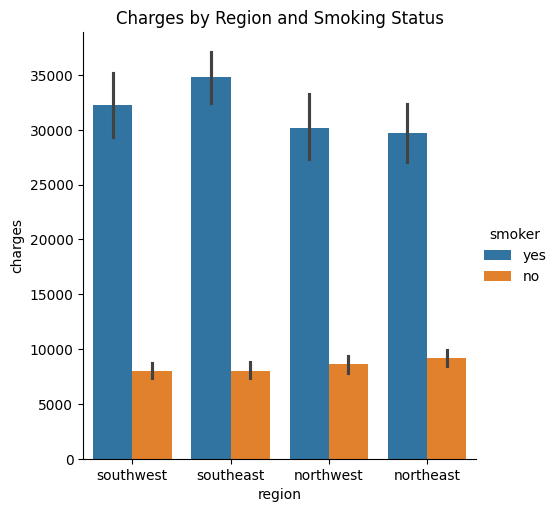

In [ ]:
# Pairplot
sns.pairplot(df_encoded[['age', 'bmi', 'children', 'charges']])
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

# Charges by region and smoker
sns.catplot(x='region', y='charges', hue='smoker', kind='bar', data=df)
plt.title("Charges by Region and Smoking Status")
plt.show()